In [101]:
import numpy as np
def parseBehaviorLog(fname):
    encticks = []
    lap = []
    reward = []
    lick = []
    commentstring = '#'
    comments = []
    with open(fname, "r") as f:
        for line in f:
            if line.startswith(commentstring):
                comments.append(line)
            else:
                tmp =  line.strip('\r\n').split(',')
            if "P" in line:
                encticks.append([np.float32(tmp[0])/1000.,np.float32(tmp[1])/1000.,tmp[3]])
            elif "R" in line:
                reward.append([np.float32(tmp[0])/1000.,np.float32(tmp[1])/1000.])
            elif "L" in line:
                lap.append([np.float32(tmp[0])/1000.,np.float32(tmp[1])/1000.])
    return (np.array(encticks,dtype='float32'),np.array(lap,dtype='float32'),
            np.array(reward,dtype='float32'),np.array(lick,dtype='float32'),comments)
#encticks,lap,reward,lick,comments = parseBehaviorLog('./20170322_143251_JC025.behaviorlog')
encticks,lap,reward,lick,comments = parseBehaviorLog("./../JC027/20170331_144043_JC027.behaviorlog")




<IPython.core.display.Javascript object>


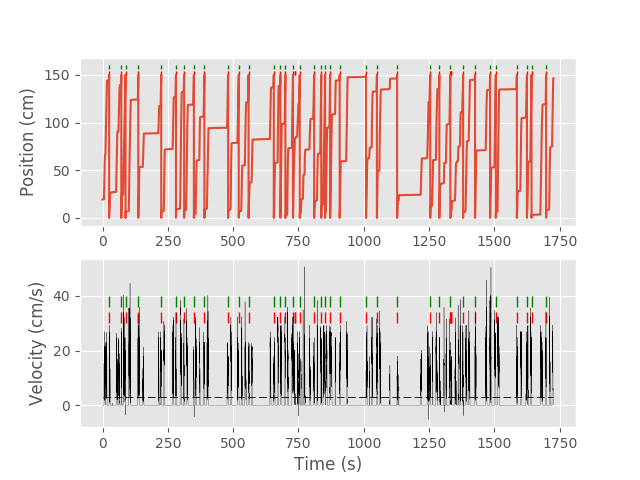

<IPython.core.display.Javascript object>


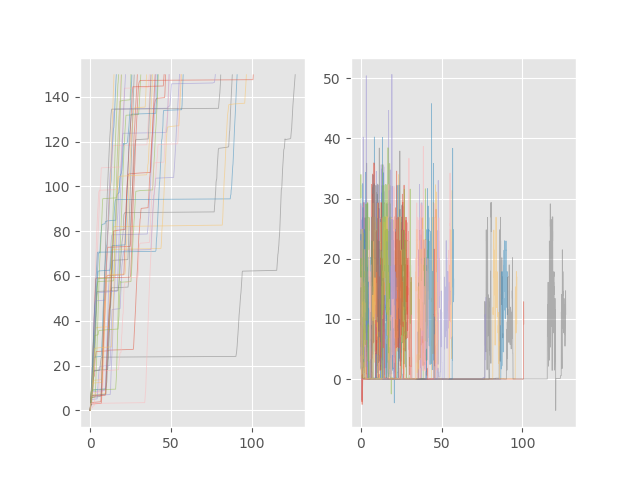

In [102]:
import pylab as plt
%matplotlib notebook

position = encticks[:,2].copy()
lapidx = np.where(np.diff(position)<-10)[0]
lapidx = np.insert(lapidx,0,-1)
averagelap = np.mean(position[lapidx])
lapcount = 0
for l in range(len(lapidx)-1):
    # plt.plot(position[lapidx[l]+1:lapidx[l+1]+1]) # check the deviation 
    position[lapidx[l]+1:lapidx[l+1]+1] /= position[lapidx[l+1]]
    position[lapidx[l]+1:lapidx[l+1]+1] += lapcount
    lapcount += 1
if not lapidx[-1] == len(position):
    position[lapidx[-1]+1:] /= averagelap
    position[lapidx[-1]+1:] += lapcount
    lapcount += 1

beltLength = 150. 
position *= beltLength
#plt.plot(encticks[:,1],position)
#plt.plot(lapidx,encticks[lapidx,2],'ko')
from scipy.interpolate import interp1d
posfunc = interp1d(encticks[:,1], position, kind='linear',bounds_error=False, fill_value=np.min(position), assume_sorted=True)
x = np.arange(0,np.max(encticks[:,1]),1./100)
y = posfunc(x)

#plt.plot(x,y)
plt.matplotlib.style.use('ggplot')
fig = plt.figure()
posax = fig.add_subplot(2,1,1)
plt.plot(x,np.mod(y,beltLength))
plt.vlines(reward[:,1],beltLength,beltLength+4,color='r',lw = 1)
plt.vlines(lap[:,1],beltLength+6,beltLength+10,color='g',lw = 1)
#for i in range(lapcount):
#    plt.hlines((i+1)*beltLength,0,x[-1],lw=0.3)
plt.ylabel('Position (cm)')

from scipy.signal import medfilt
fig.add_subplot(2,1,2,sharex=posax )
velocity = np.diff(y)/np.diff(x[:2])
plt.plot(x[:-1],medfilt(velocity,1),linewidth=0.2,color='k')
plt.vlines(reward[:,1],30,34,color='r',lw = 1)
plt.vlines(lap[:,1],36,40,color='g',lw = 1)
plt.hlines(y[-1]/x[-1],0,x[-1],linestyle='--',lw=0.6)
plt.ylabel('Velocity (cm/s)')
plt.xlabel('Time (s)')
fig = plt.figure()
posax = fig.add_subplot(1,2,1)
velax = fig.add_subplot(1,2,2)
for l in range(len(lapidx)-2):
    idx = np.where((x>encticks[lapidx[l+1],1]) & (x<=encticks[lapidx[l+2],1]))[0]
    posax.plot(x[idx] - x[idx[0]],y[idx] - y[idx[0]],lw=0.6,alpha=0.5)
    velax.plot(x[idx] - x[idx[0]],velocity[idx],lw=0.6,alpha=0.5)
    

In [100]:
lap.shape

(50, 2)